<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

##### Binary classfication ( yes / no - 0  / 1 )          

##### Categorical classfication

In this tutorial we will see how to use logistic regression for multiclass classification. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings("ignore")

<h4 style='color:purple'>EDA</h4>

In [6]:
digits=load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
df=pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [11]:
len(digits.images)


1797

In [28]:
digits.target[200]

1

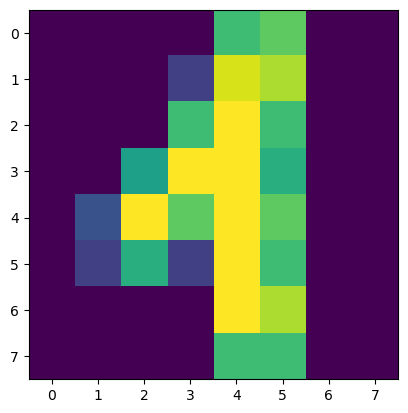

In [29]:
plt.imshow(digits.images[200])

<Figure size 640x480 with 0 Axes>

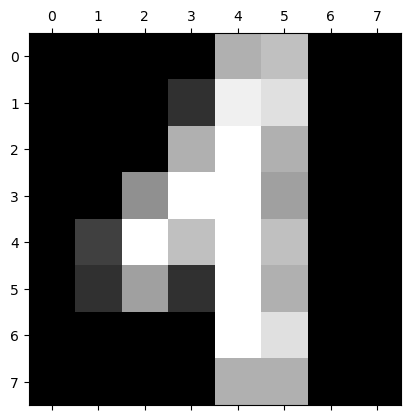

In [30]:
plt.gray()
plt.matshow(digits.images[200])

<Figure size 640x480 with 0 Axes>

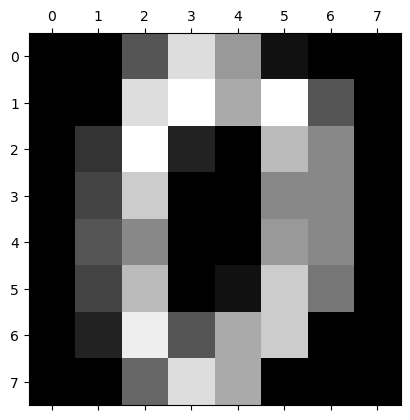

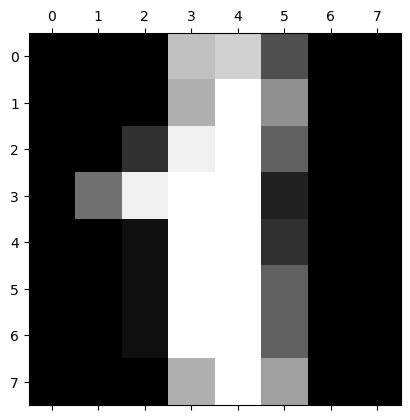

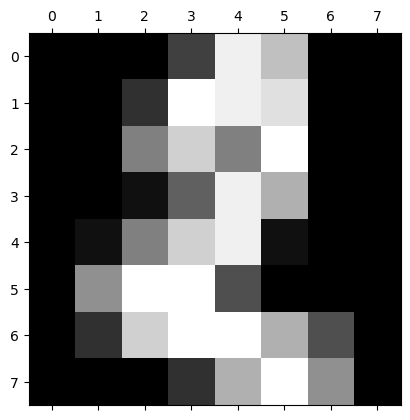

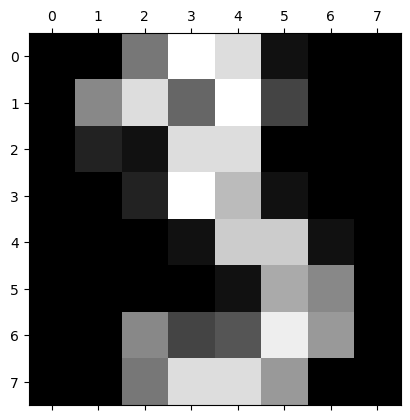

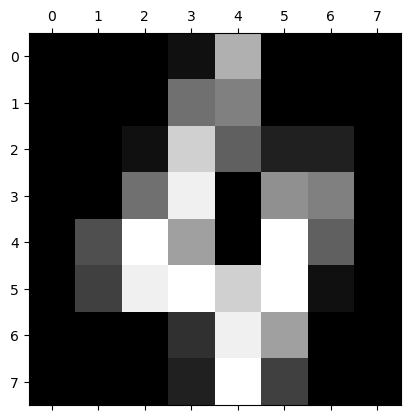

In [33]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

0

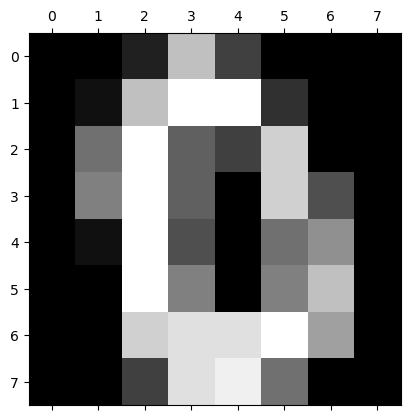

In [34]:
plt.matshow(digits.images[150])
digits.target[150] # real value 

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [35]:
len(digits.target)

1797

In [36]:
type(digits.data)

numpy.ndarray

In [37]:
x=digits.data #pixel values of images
y=digits.target

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
for i in digits.target:
    print(i)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
7
9
5
4
8
8
4
9
0
8
9
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
5
4
8
8
4
9
0
8
9
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
7
9
5
4
8
8
4
9
0
8
9
3
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [55]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [43]:
model.score(x_train,y_train) # no overfitting

1.0

In [45]:
model.score(x_test, y_test)

0.9666666666666667

In [46]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [47]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [48]:
y_pred=model.predict(x_test)

In [49]:
y_pred

array([3, 9, 8, 8, 4, 6, 8, 0, 6, 1, 6, 2, 7, 1, 9, 7, 5, 5, 9, 0, 7, 5,
       0, 4, 5, 5, 8, 1, 5, 4, 8, 0, 0, 4, 6, 1, 6, 3, 6, 8, 6, 8, 6, 7,
       0, 3, 5, 6, 7, 1, 2, 9, 1, 6, 4, 0, 4, 2, 6, 1, 7, 1, 7, 4, 1, 6,
       3, 7, 2, 2, 2, 1, 2, 1, 1, 7, 9, 0, 2, 2, 1, 0, 0, 7, 9, 5, 3, 0,
       7, 0, 1, 9, 9, 8, 7, 2, 8, 7, 2, 7, 6, 8, 2, 5, 2, 2, 9, 6, 2, 5,
       4, 5, 3, 6, 0, 0, 3, 3, 6, 7, 2, 8, 6, 6, 6, 2, 9, 3, 3, 1, 0, 0,
       9, 3, 9, 9, 3, 1, 9, 2, 3, 8, 0, 5, 4, 5, 8, 7, 6, 6, 8, 9, 8, 6,
       7, 4, 1, 0, 2, 2, 3, 3, 6, 5, 6, 7, 3, 4, 8, 1, 5, 4, 8, 3, 8, 4,
       3, 7, 9, 6, 2, 9, 7, 4, 1, 9, 5, 8, 7, 3, 9, 9, 7, 7, 2, 1, 2, 3,
       7, 7, 6, 1, 6, 0, 9, 5, 5, 4, 0, 4, 1, 6, 3, 7, 9, 3, 6, 9, 4, 0,
       6, 0, 0, 6, 2, 6, 4, 2, 2, 3, 8, 6, 1, 4, 0, 7, 0, 1, 9, 2, 6, 4,
       0, 0, 3, 9, 4, 6, 8, 5, 0, 6, 7, 9, 2, 8, 9, 7, 8, 8, 0, 0, 6, 8,
       5, 8, 0, 6, 4, 3, 3, 0, 0, 0, 3, 4, 2, 1, 1, 5, 8, 6, 1, 7, 8, 2,
       2, 6, 6, 1, 5, 4, 3, 0, 9, 7, 6, 5, 2, 8, 5,

In [50]:
len(y_pred)

360

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)# compare between predicted values, actual values 
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 26,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 35]], dtype=int64)

<Figure size 1000x700 with 0 Axes>

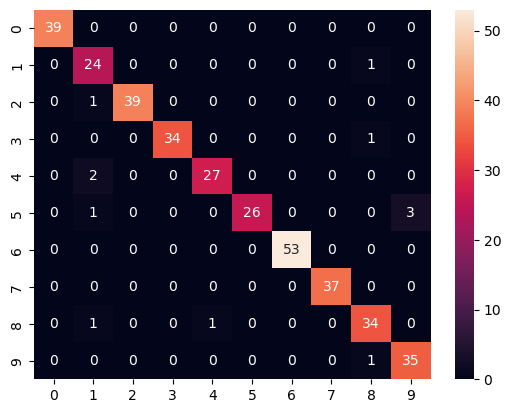

<Figure size 1000x700 with 0 Axes>

In [53]:
import seaborn as sn
plt.xlabel('predicted')
plt.ylabel('truth')
sn.heatmap(cm,annot=True)
plt.figure(figsize=(10,7))